In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
def imshow(img):
    plt.imshow(img, cmap='gray')
    plt.show()

(203, 307, 3)


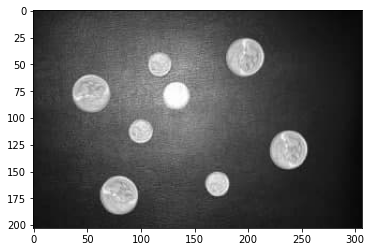

In [4]:
img = cv.imread('coins.jpg', cv.COLOR_BGR2GRAY)
#img = img[:,:,2]
m,n,z = img.shape
print(img.shape)
plt.imshow(img)

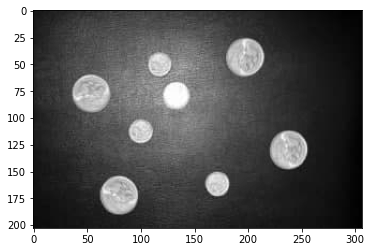

In [5]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
imshow(gray)

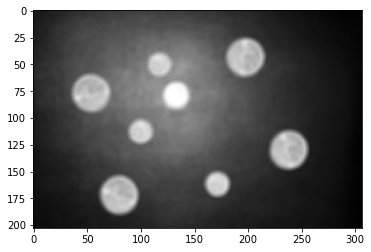

In [6]:
size=5
blur_kernel = np.ones((size,size))
blur_kernel /= (size*size)
gray = cv.filter2D(gray, -1, blur_kernel)

imshow(gray)

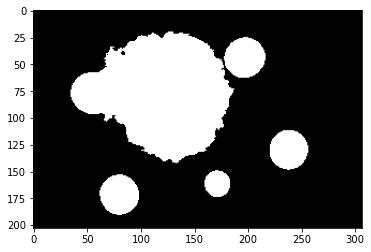

In [7]:
ret, binar_gray = cv.threshold(gray,0,255, cv.THRESH_OTSU)
imshow(binar_gray)

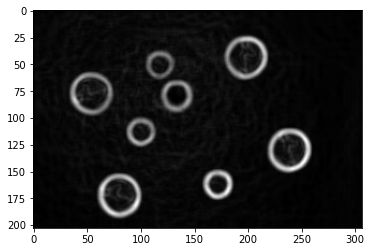

In [8]:
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(4,4))
gradient = cv.morphologyEx(gray, cv.MORPH_GRADIENT, kernel)
imshow(gradient)

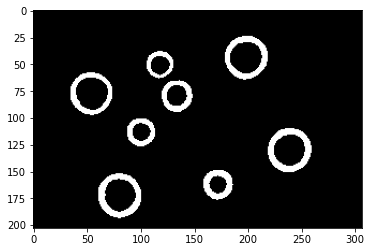

In [9]:
ret, binar = cv.threshold(gradient,0,255, cv.THRESH_OTSU)
imshow(binar)

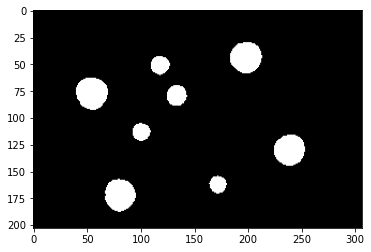

In [12]:
copyImg=255-binar
h, w = binar.shape[:2]
mask = np.zeros ([h + 2, w + 2], np.uint8) 
cv.floodFill(copyImg, mask, (0,0), (0,0,0))
plt.imshow(copyImg, cmap='gray')

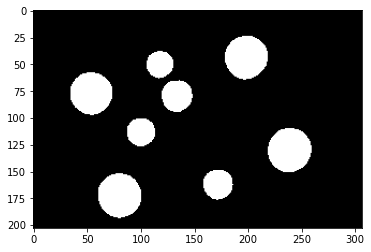

In [13]:
copyImg+=binar
imshow(copyImg)

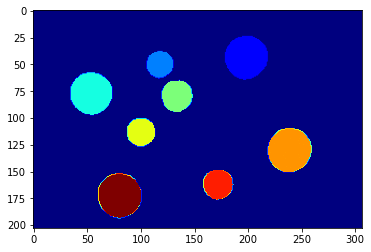

In [14]:
count_components, markers = cv.connectedComponents(copyImg)
plt.imshow(markers, cmap="jet")

In [16]:
print(count_components)
#Найдем, какой маркер отвечает за фон, исходя из предположения, что этого цвета больше всего
background = 0 
bg_pix = 0
for i in range(count_components):
    pix_count = len(markers[markers==i])
    if (pix_count > bg_pix):
        bg_pix = pix_count
        background = i
print("Фон это маркер номер",background) #Зная, какой маркер отвечает за фон, посчитаем среднюю площадь объекта на картинке (в пикселях)

9
Фон это маркер номер 0


In [17]:
pix_avg = 0
pix_avg += len(markers[markers!=background])
pix_avg /= (count_components-1)
print(pix_avg)

935.0


In [18]:
big_obs_count = 0
small_obs_count = 0

for i in range(background):
    pix_count = len(markers[markers==i])
    if (pix_count > pix_avg):
        markers[markers==i] = 1
        big_obs_count+=1
    else:
        markers[markers==i] = 2
        small_obs_count +=1
        
for i in range(background+1, count_components):
    pix_count = len(markers[markers==i])
    if (pix_count > pix_avg):
        markers[markers==i] = 1
        big_obs_count +=1
    else:
        markers[markers==i] = 2
        small_obs_count +=1

Общее количество 8
Количество больших: 4
Количество маленьких: 4


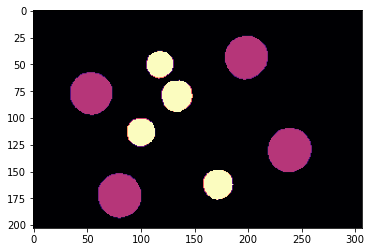

In [19]:
print("Общее количество", count_components-1)
print("Количество больших:", big_obs_count)
print("Количество маленьких:", small_obs_count)
plt.imshow(markers, cmap="magma")